# Project: Wrangling and Analyzing *WeRateDogs* Data

### Submitted by: Ahmed Mohamed Hussein Unshur

----------------------------

### Table of Contents:



<ul>
<li><a href="#introduction">1. Introduction</a></li>
<li><a href="#gathering">2. Data Gathering</a></li>
    <li><a href="#gathering-1">2.1. WeRateDogs Twitter Archive</a></li>
    <li><a href="#gathering-2">2.2. Tweet Image Predictions</a></li>
    <li><a href="#gathering-3">2.3. Additional Data from the Twitter API</a></li>
<li><a href="#assessing">3. Assessing Data</a></li>
    <li><a href="#assessing-1">3.1. Assessing Twitter Archive Data</a></li>
    <li><a href="#assessing-2">3.2. Assessing Tweet Image Predictions Data</a></li>
    <li><a href="#assessing-3">3.3. Assessing Data from the Twitter API</a></li>
    <li><a href="#summary">3.4. Summary of Identified Quality and Tidiness Issues</a></li>
<li><a href="#cleaning">4. Cleaning Data</a></li>
    <li><a href="#quality-issues">4.1. Cleaning Quality Issues</a></li>
    <li><a href="#tidiness-issues">4.2. Cleaning Tidiness Issues</a></li>
    <li><a href="#storing-data">4.3. Storing Data</a></li>
<li><a href="#analysis">5. Analyzing and Visualizing Data</a></li>
<li><a href="#conclusion">6. Conclusion</a></li>
<li><a href="#references">7. References</a></li>
    
    
    

<a id='introduction'></a>
## 1. Introduction

The following report presents a data wrangling project that was completed as part of [Udacity’s Data Analyst Nanodegree](https://www.udacity.com/course/data-analyst-nanodegree--nd002) program.

Data collected from the real-world is mostly dirty and messy, which is why it’s important to acquire a number of skills of handling and cleaning such data. 

The dataset that was wrangled (and then analyzed and visualized) is the tweet archive of the Twitter account [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs).

For this project, we have followed the wrangling process of gathering, assessing, and cleaning data.

<a id='gathering'></a>
## 2. Data Gathering




Before starting data gathering, we will import required Python libraries.


In [1]:
# Import required packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import tweepy
import json


# Enable inline plotting.
%matplotlib inline

# Set seaborn's default theme.
sb.set_theme()

# Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

We will gather three datasets using three different methods. 

<a id='gathering-1'></a>
### 2.1. WeRateDogs Twitter Archive

This dataset was provided by Udacity as a CSV file. We downloaded manually from the following link: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv

In [2]:
# Load 'Twitter archive enhanced' dataset.
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv') 

In [3]:
# Check if data was read correctly by showing one sample.
twitter_archive.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1592,686394059078897668,NaN,NaN,2016-01-11 03:47:50 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pup's having a nightmare that he forgot t...,NaN,NaN,NaN,https://vine.co/v/iMqBebnOvav,12,10,None,None,None,None,None


<a id='gathering-2'></a>
### 2.2. Tweet Image Predictions

This dataset is in a TSV file on Udacity’s servers. We will download the file programmatically using the Requests library and the following URL: 
https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv


In [4]:
# Download 'image_predictions.tsv' file using the Requests library.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Write response into a file.
with open('image-predictions.tsv', mode = 'wb') as file:
          file.write(response.content)

In [5]:
# Load 'Image predictions' dataset.
img_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')

In [6]:
# Check if data was read correctly by showing one sample.
img_prediction.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
730,686618349602762752,https://pbs.twimg.com/media/CYdbvwjWcAEtjYu.jpg,1,Rottweiler,0.441331,True,miniature_pinscher,0.23318,True,Gordon_setter,0.093582,True


<a id='gathering-3'></a>
### 2.3. Additional Data from the Twitter API

The project requires gathering additional data from the Twitter API using Python's [Tweepy](http://www.tweepy.org) library and then storing JSON data into a file. Getting access to the Twitter API requires to set up a developer account in Twitter, submitting an application, and waiting for approval.

Udacity provided directions to access required additional data without a Twitter account. We have followed those directions.

Udacity provided the following two files:
1. `twitter_api.py` which contains the code found below that is used to gather the requied data for the project. After reading and understanding how the code works, we have copied and pasted it into our Jupyter notebook based on Udacity's instructions.
2. `tweet_json.txt` which contains the resulting data from `twitter_api.py`.

We will read the `tweet_json.txt` file line by line into a Pandas dataframe with the following columns: id, retweet count, and favorite count. Then, we will save the dataframe into a CSV file.

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [7]:
# Read 'tweet-json.txt' file and print the fist line.
with open('tweet-json.txt') as json_file:
    for line in json_file:
        print(line)
        break

{"created_at": "Tue Aug 01 16:23:56 +0000 2017", "id": 892420643555336193, "id_str": "892420643555336193", "full_text": "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", "truncated": false, "display_text_range": [0, 85], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 892420639486877696, "id_str": "892420639486877696", "indices": [86, 109], "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "url": "https://t.co/MgUWQ76dJU", "display_url": "pic.twitter.com/MgUWQ76dJU", "expanded_url": "https://twitter.com/dog_rates/status/892420643555336193/photo/1", "type": "photo", "sizes": {"large": {"w": 540, "h": 528, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 540, "h": 528, "resize": "fit"}, "medium": {"w": 540, "h": 528, "resize": "fit"}}}]}, "extended_entities": {"media

In [8]:
#Create an empty list.
df_list = []

# Read 'tweet-json.txt' file line by line.
# Add each line in the file to the list.
with open('tweet-json.txt') as json_file:
    for line in json_file:
        data = json.loads(line)
        df_list.append(data)

# Create dataframe containing 'id, retweet_count, and favorite_count' columns.
tweet_counts = pd.DataFrame(df_list, columns = ['id', 'retweet_count', 'favorite_count'])

# Save dataframe into a CSV file.
tweet_counts.to_csv('tweets_data.csv', index = False)

In [9]:
# Load 'tweets' dataset.
tweet_counts = pd.read_csv('tweets_data.csv')

# Check if data was read correctly by showing one sample.
tweet_counts.sample()

,id,retweet_count,favorite_count
1915,674291837063053312,6533,15817


<a id='assessing'></a>
## 3. Assessing Data

In this section, we will conduct assessment on the three datasets to identify quality and tidiness issues using both visual and programmatic assessments.

Assessing the entire datasets completely is not required in this project. 

<a id='assessing-1'></a>
### 3.1. Assessing Twitter Archive Data

In [10]:
# view the first 10 rows of the dataset.
twitter_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
# View the last 10 rows of the dataset.
twitter_archive.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [12]:
# view a sample 10 rows of the dataset.
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
829,768909767477751808,NaN,NaN,2016-08-25 20:35:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: When it's Janet from accounting...,7.001438e+17,4.196984e+09,2016-02-18 02:24:13 +0000,https://twitter.com/dog_rates/status/700143752...,10,10,None,None,None,pupper,None
1971,673270968295534593,NaN,NaN,2015-12-05 22:41:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mac. His dad's probably a lawyer. 11/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673270968...,11,10,Mac,None,None,None,None
2077,670833812859932673,NaN,NaN,2015-11-29 05:16:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jett. He is unimpressed by flower. 7/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670833812...,7,10,Jett,None,None,None,None
178,857263160327368704,NaN,NaN,2017-04-26 16:00:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oscar and Oliver. Oliver shrunk Oscar....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/857263160...,13,10,Oscar,None,None,None,None
69,879050749262655488,NaN,NaN,2017-06-25 18:56:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Steven. He has trouble relating to oth...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879050749...,11,10,Steven,None,None,None,None
2271,667495797102141441,NaN,NaN,2015-11-20 00:12:54 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Philippe from Soviet Russia. Commandin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667495797...,9,10,Philippe,None,None,None,None
112,870804317367881728,NaN,NaN,2017-06-03 00:48:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Real funny guys. Sending in a pic without a do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/870804317...,11,10,None,None,None,None,None
245,845812042753855489,NaN,NaN,2017-03-26 01:38:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We usually don't rate polar bears but this one...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/845812042...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
724,782747134529531904,NaN,NaN,2016-10-03 01:00:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Deacon. He's the happiest almost dry d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/782747134...,11,10,Deacon,doggo,None,None,None


* Based on visual assessment of the dataframe, we can see that there are some unusual names in the `name` column, e.g. a, an, the. This is a quality issue.

* Also, the dog stages are in four separate columns when they should be in one column. This makes the data untidy.

In [13]:
# show number of columns and rows within the dataset.
twitter_archive.shape

(2356, 17)

In [14]:
# Show duplicates in the dataset.
sum(twitter_archive.duplicated())

0

The dataset consists of 2356 columns and 17 rows. There are no two identical rows in the dataset.

In [15]:
# Show concise summary of the dataframe.
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Using the `.info()` method and focusing on the datatypes, we have discovered the following issues:
* tweet_id is a float instead of string.
* timstamp is a string not a datetime datatype.
* The four columns of the dog stages `(doggo, floofer, pupper, and puppo)` should be a categorical datatype instead of string.

The data contains 181 duplicate tweets (retweets) as evident from `retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp`.


In the visual assessment, we have identified some unusual names in the `name` column, and now we will conduct programmatic assessment using the `.unique` and `value_counts` methods.

In [16]:
# Print unique values and counts in the 'name' column.
print(twitter_archive.name.unique())
print(twitter_archive.name.value_counts())

['Phineas' 'Tilly' 'Archie' 'Darla' 'Franklin' 'None' 'Jax' 'Zoey'
 'Cassie' 'Koda' 'Bruno' 'Ted' 'Stuart' 'Oliver' 'Jim' 'Zeke' 'Ralphus'
 'Canela' 'Gerald' 'Jeffrey' 'such' 'Maya' 'Mingus' 'Derek' 'Roscoe'
 'Waffles' 'Jimbo' 'Maisey' 'Lilly' 'Earl' 'Lola' 'Kevin' 'Yogi' 'Noah'
 'Bella' 'Grizzwald' 'Rusty' 'Gus' 'Stanley' 'Alfy' 'Koko' 'Rey' 'Gary'
 'a' 'Elliot' 'Louis' 'Jesse' 'Romeo' 'Bailey' 'Duddles' 'Jack' 'Emmy'
 'Steven' 'Beau' 'Snoopy' 'Shadow' 'Terrance' 'Aja' 'Penny' 'Dante'
 'Nelly' 'Ginger' 'Benedict' 'Venti' 'Goose' 'Nugget' 'Cash' 'Coco' 'Jed'
 'Sebastian' 'Walter' 'Sierra' 'Monkey' 'Harry' 'Kody' 'Lassie' 'Rover'
 'Napolean' 'Dawn' 'Boomer' 'Cody' 'Rumble' 'Clifford' 'quite' 'Dewey'
 'Scout' 'Gizmo' 'Cooper' 'Harold' 'Shikha' 'Jamesy' 'Lili' 'Sammy'
 'Meatball' 'Paisley' 'Albus' 'Neptune' 'Quinn' 'Belle' 'Zooey' 'Dave'
 'Jersey' 'Hobbes' 'Burt' 'Lorenzo' 'Carl' 'Jordy' 'Milky' 'Trooper'
 'Winston' 'Sophie' 'Wyatt' 'Rosie' 'Thor' 'Oscar' 'Luna' 'Callie'
 'Cermet' 'George

From the above output, we can identify extra odd names, e.g. such, old, his, all, by. One thing to note is that all these unusual names start with a small letter, whereas other names start with a capital letter. So, names starting with small letters are not real names.

We can also see 745 *None* enteries which we believe that it was used for dogs with no names.

<a id='assessing-2'></a>
### 3.2. Assessing Tweet Image Predictions Data

In [17]:
# view the first 5 rows of the dataset.
img_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
# view the first 5 rows of the dataset.
img_prediction.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


There are three image predictions. One Prediction is enough, and we can use the one with the highest confidence level.

In [19]:
# Show concise summary of the dataframe.
img_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


* tweet_id datatype is an integer instead of string.

In [20]:
# Check whether all values in columns 'p1_conf, p2_conf, and p3_conf' are equal.
print(img_prediction['p1_conf'].equals(img_prediction['p2_conf']))
print(img_prediction['p1_conf'].equals(img_prediction['p3_conf']))
print(img_prediction['p2_conf'].equals(img_prediction['p3_conf']))

# Check whether there are values in columns 'P2_conf and p3_conf' that are greater than those in column 'p1_conf'.
print(sum(img_prediction['p1_conf'] < img_prediction['p2_conf']))
print(sum(img_prediction['p1_conf'] < img_prediction['p3_conf']))

False
False
False
0
0


The above output shows that:
1. All values in columns `p1_conf, p2_conf, and p3_conf` are not equal.
2. All values in column `p1_conf` are greater than those in columns `p2_conf and p3_conf`.


<a id='assessing-3'></a>
### 3.3. Assessing Data from the Twitter API

In [21]:
# view the first 10 rows of the dataset.
tweet_counts.head(10)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [22]:
# view the last 10 rows of the dataset.
tweet_counts.tail(10)

,id,retweet_count,favorite_count
2344,666058600524156928,61,115
2345,666057090499244032,146,304
2346,666055525042405380,261,448
2347,666051853826850816,879,1253
2348,666050758794694657,60,136
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [23]:
# Show concise summary of the dataframe.
tweet_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


* id datatype should be a string instead of integer.
* id column should be labeled as *tweet_id* to create consistency across all three dataframes.

The datasets gathered and assessed are from the same observational unit, but they are in three separate dataframes. This is a tidiness issue.


<a id='summary'></a>
### 3.4. Summary of Identified Quality and Tidiness Issues

**After assessing the datasets using visual and programmatic assessments, we have idetified the following quality issues:**

**`Twitter archive` dataframe:**

1. tweet_id is a float instead of string.
2. timestamp is a string not a datetime datatype.
3. Non-names in the name column, e.g. a, an, the, by, his.
4. Dog stage columns (doggo, floofer, pupper, and puppo) are string instead of categorical datatype.
5. Duplicate tweets (181 retweets).

**`Image predictions` dataframe:**

6. tweet_id datatype is an integer instead of string.
7. Multiple predictions (p1, p2, and p3).

**`Tweet counts` dataframe:**

8. id datatype should be a string instead of an integer.
9. id column should be labeled as tweet_id.


**We have also identified the following tidiness issues:**

1. In `Twitter archive` dataframe, dog stages are in four separate columns instead of one column.
2. All datasets are from the same observational unit, but they are in three separate dataframes.







<a id='cleaning'></a>
## 4. Cleaning Data


In this section, we will clean the issues documented in the assessments section.

We will clean the data programmatically using the following systematic cleaning process:
1. **Define**: First, we define our data cleaning plan in writing. This will serve as a how-to guide that helps us and also a documentation for reproducibility purposes.
2. **Code**: In this step, will will translate the definitions into code and then run it.
3. **Test**: Finally, we will test our dataset using code. The purpose is to make sure that the cleaning code work properly.

But, before starting the cleaning process, we have to make copies of our original datasets.

In [24]:
# Make copies of original datasets.
twitter_archive_clean = twitter_archive.copy()
img_prediction_clean = img_prediction.copy()
tweet_counts_clean = tweet_counts.copy()

We will clean quality issues first, and then the tidiness issues.

<a id='quality-issues'></a>
### 4.1. Cleaning Quality Issues

#### **`Twitter archive` dataframe:**

#### Issue 1: tweet_id is a float instead of string.

##### Define:  
Change tweet_id datatype to string.

#### Code

In [25]:
# Convert `tweet_id` to string.
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)

#### Test

In [26]:
# Check if cleaning code worked properly.
twitter_archive_clean.tweet_id.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2356 entries, 0 to 2355
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2356 non-null   object
dtypes: object(1)
memory usage: 18.5+ KB


#### Issue 2: timestamp is a string not a datetime datatype.

#### Define
Change timestamp to datetime.

#### Code

In [27]:
# Convert `timestamp` to datetime.
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

#### Test

In [28]:
# Check if cleaning code worked correctly.
twitter_archive_clean.timestamp.dtypes

datetime64[ns, UTC]

#### Issue 3: Non-names in the name column, e.g. a, an, the, by, his.

#### Define
Replace non-names with *None*.

#### Code

In [29]:
# Change non-names starting with small letters with None.
twitter_archive_clean.name = twitter_archive_clean.name.str.replace('^[a-z]+', 'None')

#### Test

In [30]:
# Check if changing occured correctly.
twitter_archive_clean.name.value_counts()

None          854
Charlie        12
Lucy           11
Cooper         11
Oliver         11
             ... 
Devón           1
Gert            1
Dex             1
Ace             1
Christoper      1
Name: name, Length: 932, dtype: int64

We can see that changes occured properly. The number of *None* enteries were 745 and now increased to 854.

#### Issue 4: Dog stage columns (doggo, floofer, pupper, and puppo) are string instead of categorical datatype.

#### Define
Change dog stage columns (dogo, floofer, pupper, and puppo) to categorical datatype.

#### Code

In [31]:
# Change dog stage columns to categorical datatype.
twitter_archive_clean.doggo = twitter_archive_clean.doggo.astype('category')
twitter_archive_clean.floofer = twitter_archive_clean.floofer.astype('category')
twitter_archive_clean.pupper = twitter_archive_clean.pupper.astype('category')
twitter_archive_clean.puppo = twitter_archive_clean.puppo.astype('category')

#### Test

In [32]:
# Check if datatype conversion occured properly.
twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   doggo    2356 non-null   category
 1   floofer  2356 non-null   category
 2   pupper   2356 non-null   category
 3   puppo    2356 non-null   category
dtypes: category(4)
memory usage: 9.8 KB


#### Issue 5: Duplicate tweets (181 retweets).

#### Define
Remove retweets from the dataset.

#### Code

In [33]:
# Summary of dataframe before removing retweets.
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [34]:
# Remove retweets by filtering the missing values of the `retweeted_status_id'.
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_id'])]

# Drop columns related to retweeted status.
twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id',
                            'retweeted_status_timestamp'], axis = 1, inplace=True)

#### Test

In [35]:
# Summary of dataframe after removing retweets.
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   object             
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  doggo                  2175 non-null   category           
 11  floofer                2175 non-null   category         

We can see that the retweets were removed correclty.

#### **`Image predictions` dataframe:**

#### Issue 6: tweet_id datatype is an integer instead of string.

#### Define
Change tweet_id datatype to string.

#### Code

In [36]:
# Convert `tweet_id` to string.
img_prediction_clean.tweet_id = img_prediction_clean.tweet_id.astype(str)

#### Test

In [37]:
# Check if cleaning occured correctly.
img_prediction_clean.tweet_id.dtypes

dtype('O')

#### Issue 7: Multiple predictions (p1, p2, and p3).

#### Define
Romove columns related to second and third predictions.

#### Code

In [38]:
# Summary of dataframe before removing columns.
img_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [39]:
# Remove columns related to second and third predictions.
img_prediction_clean.drop(['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1, inplace=True)

#### Test

In [40]:
# Summary of dataframe after removing columns.
img_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 83.2+ KB


#### **`Tweet counts` dataframe:**

#### Issue 8: id datatype should be a string instead of an integer.

#### Define

Covert id datatype to string.

#### Code

In [41]:
# Convert `id` to string.
tweet_counts_clean.id = tweet_counts_clean.id.astype(str)

#### Test

In [42]:
# Check if conversion occured correctly.
tweet_counts_clean.id.dtypes

dtype('O')

#### Issue 9: id column should be labeled as tweet_id.

#### Define

Change id column label from `id` to `tweet_id`.

#### Code

In [43]:
# Change coloum label from 'id' to 'tweet_id'
tweet_counts_clean.rename(columns = {'id' : 'tweet_id'}, inplace = True)

#### Test

In [44]:
# Check if changing occured correctly.
tweet_counts_clean.tweet_id.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2354 entries, 0 to 2353
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2354 non-null   object
dtypes: object(1)
memory usage: 18.5+ KB


Column label was changed correctly. We can see that the *Series* name is `tweet_id`.

<a id='tidiness-issues'></a>
### 4.2. Cleaning Tidiness Issues

#### Issue 1: In `Twitter archive` dataframe, dog stages are in four separate columns instead of one column.

#### Define

Combine all four dog stage columns into one column.

#### Code

In [45]:
twitter_archive_clean.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1020,746757706116112384,NaN,NaN,2016-06-25 17:31:25+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Maddie. She gets some wicked air time....,https://vine.co/v/5BYq6hmrEI3,11,10,Maddie,None,None,None,None


In [46]:
# Create a new column 'dog_stage' in the dataframe.
# Extract dog stages from the 'text' column, and if found put them them in the 'dog_stage' column.
twitter_archive_clean['dog_stage'] = twitter_archive_clean.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

# Drop 'doggo', 'floofer', 'pupper', and 'puppo' columns. They are not needed anymore.
twitter_archive_clean = twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1)

# Change dog stage column to categorical datatype.
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.astype('category')

#### Test

In [47]:
twitter_archive_clean.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1547,689280876073582592,NaN,NaN,2016-01-19 02:59:01+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Herald. He wants you to know he could ...,https://twitter.com/dog_rates/status/689280876...,10,10,Herald,NaN


In [48]:
# Check 'dog_stage' column datatype.
twitter_archive_clean.dog_stage.dtypes

CategoricalDtype(categories=['doggo', 'floofer', 'pupper', 'puppo'], ordered=False)

The output above shows that `dog_stage` column was created and populated with the stage names.

#### Issue 2: All datasets are from the same observational unit, but they are in three separate dataframes.

#### Define

Merge all three dataframes into a master dataset based on `tweet_id`.

#### Code

In [49]:
# Merge dataframes.
# We didn't specify the type of joining, becuase we wanted to use the default (how = 'inner') to 'use intersection of keys from dataframes'.
master_data = pd.merge(twitter_archive_clean, tweet_counts_clean, on = 'tweet_id')
master_data = pd.merge(master_data, img_prediction_clean, on = 'tweet_id')

#### Test

In [50]:
# Show summary of dataframe to check whether merging occured.
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   object             
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              1994 non-null   datetime64[ns, UTC]
 4   source                 1994 non-null   object             
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   rating_numerator       1994 non-null   int64              
 8   rating_denominator     1994 non-null   int64              
 9   name                   1994 non-null   object             
 10  dog_stage              326 non-null    category           
 11  retweet_count          1994 non-null   int64            

The output above shows that all three dataframes were merged.

<a id='storing-data'></a>
### 4.3. Storing Data
Now, we will save the *master data* to a CSV file.


In [51]:
master_data.to_csv('twitter_archive_master.csv', index = False)

<a id='analysis'></a>
## 5. Analyzing and Visualizing Data


In this section, we will analyze and visualize the wrangled data and then produce insights and visualizations.

In [52]:
# Load dataset.
master_data = pd.read_csv('twitter_archive_master.csv', dtype = {'dog_stage' : 'category'})

# Show summary of dataframe.
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   tweet_id               1994 non-null   int64   
 1   in_reply_to_status_id  23 non-null     float64 
 2   in_reply_to_user_id    23 non-null     float64 
 3   timestamp              1994 non-null   object  
 4   source                 1994 non-null   object  
 5   text                   1994 non-null   object  
 6   expanded_urls          1994 non-null   object  
 7   rating_numerator       1994 non-null   int64   
 8   rating_denominator     1994 non-null   int64   
 9   name                   1994 non-null   object  
 10  dog_stage              326 non-null    category
 11  retweet_count          1994 non-null   int64   
 12  favorite_count         1994 non-null   int64   
 13  jpg_url                1994 non-null   object  
 14  img_num                1994 non-null   i

We are interested in answering the following:

1. The percentage of dogs in each stage.
2. The tweet with the highest retweet count and the tweet with the lowest retweet count.
4. The relationship between retweet and favorite counts.


### 5.1. The perecentage of dog stages.

In [53]:
# Count the number of dogs in each stage.
master_data.dog_stage.value_counts()

pupper     223
doggo       72
puppo       28
floofer      3
Name: dog_stage, dtype: int64

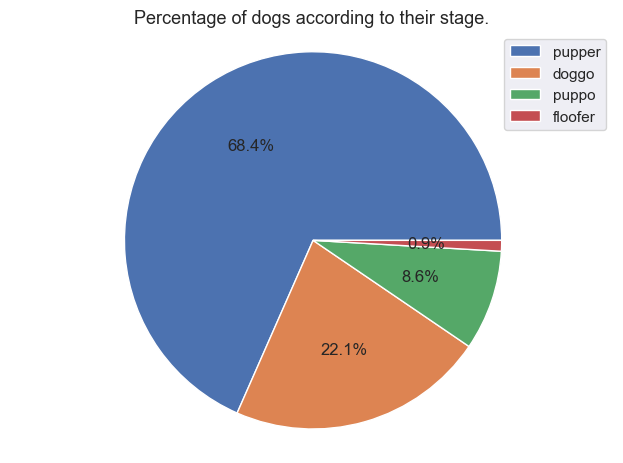

In [54]:
# Visualize percentage of dog stages using pie chart.
master_data.dog_stage.value_counts().plot(kind = 'pie', autopct='%1.1f%%', labels = None, legend = True)
plt.title('Percentage of dogs according to their stage.', size = 13, y = 1)
plt.tight_layout()
plt.axis('equal')
plt.ylabel('')
plt.xlabel('')
plt.show()

The pie chart above illustrates that the dog stage with the highest percentage is Pupper (68.4%) whereas the one with the lowest percentage is Floofer (0.9%).

### 5.2. The tweet with the highest retweet count and the one with the lowest retweet count.

In [55]:
# View describtive statistics of the retweet count.
master_data.retweet_count.describe()

count     1994.000000
mean      2766.753260
std       4674.698447
min         16.000000
25%        624.750000
50%       1359.500000
75%       3220.000000
max      79515.000000
Name: retweet_count, dtype: float64

In [56]:
# View 'tweet_id' of the tweet with the highest retweet count.
list(master_data[master_data['retweet_count'] == master_data['retweet_count'].max()].tweet_id)

[744234799360020481]

In [57]:
# View 'tweet_id' of the tweet with the lowest retweet count.
list(master_data[master_data['retweet_count'] == master_data['retweet_count'].min()].tweet_id)

[666102155909144576]

The analysis above shows that the highest retweeted tweet has the tweet id `744234799360020481` and a retweet count of 79515, whereas the lowest retweeted tweet has the tweet id `666102155909144576` and a retweet count of 16.

### 5.3. The relationship between retweet and favorite counts.

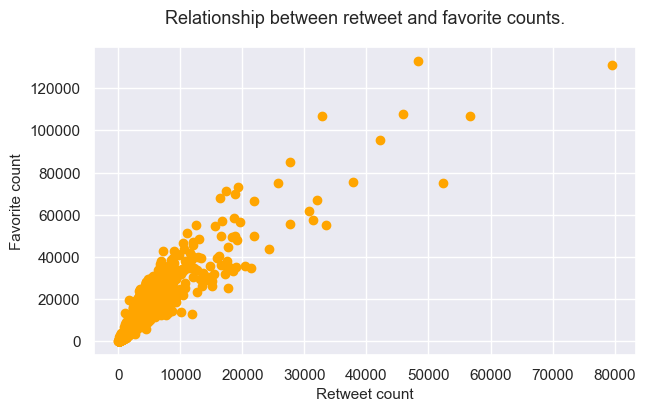

In [58]:
# Visualize relationship between retweet count and favorite count using scatter plot.
retweet = master_data.retweet_count
favorite = master_data.favorite_count
plt.figure(figsize = (7, 4))
plt.scatter(retweet, favorite, color = 'orange')
plt.title('Relationship between retweet and favorite counts.',  size=13, y=1.05)
plt.xlabel('Retweet count', size = 11)
plt.ylabel('Favorite count', size =11) 
plt.show()

The scatter plot above shows that there is a positive correlation between retweet count and favorite count.

<a id='conclusion'></a>
## 6. Conclusion

In this project, we wrangled dataset of the Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). We have gathered, assessed, and cleaned three datasets using different methods and functions. Finally, we conducted analysis and visualization, and discoverd a number of insights.

<a id='references'></a>
## 7. References

1. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
2. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
3. https://stackoverflow.com/questions/17950374/converting-a-column-within-pandas-dataframe-from-int-to-string
4. https://stackoverflow.com/questions/2385701/regular-expression-for-first-and-last-name
5. https://dataindependent.com/pandas/pandas-change-column-names-3-methods/
6. https://docs.python.org/3/library/warnings.html
7. https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
8. https://stackoverflow.com/questions/12451431/loading-and-parsing-a-json-file-with-multiple-json-objects
9. https://pandas.pydata.org/docs/user_guide/categorical.html
10. https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html
11. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
12. https://statisticsglobe.com/specify-dtype-when-reading-pandas-dataframe-from-csv-file-python

